In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
taxi_df = pd.read_csv('taxi_zones_with_latlong.csv')
twitter_df = pd.read_excel('twitter_us_2018-10-31_18h.xlsx')

In [3]:
taxi_df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,long
0,1,0.116357,0.000782,Newark Airport,1,EWR,-74.176786,40.689516
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,-73.826126,40.625724
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,-73.849479,40.865888
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,-73.977023,40.724152
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,-74.189930,40.550340
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,-73.856351,40.899103
259,260,0.133514,0.000422,Woodside,260,Queens,-73.903713,40.746798
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,-74.012919,40.708976
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,-73.945830,40.776534


In [36]:
coordinates = twitter_df['coordinates'].apply(lambda x: x.split('[')[1].split(']')[0])
twitter_lat = coordinates.apply(lambda x: float(x.split(',')[0]))
twitter_long = coordinates.apply(lambda x: float(x.split(',')[1]))

In [37]:
twitter_long

0       40.758742
1       40.777900
2       40.693280
3       40.850000
4       40.714200
          ...    
1112    40.683033
1113    40.716100
1114    40.813253
1115    40.763324
1116    40.936997
Name: coordinates, Length: 1117, dtype: float64

<b> Data Processing </b>

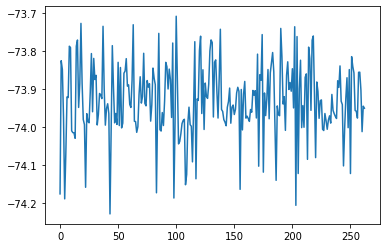

In [4]:
plt.plot(taxi_df['lat'])
plt.show()

Freedman–Diaconis number of bins: 69
PLOTTING LATITUDE


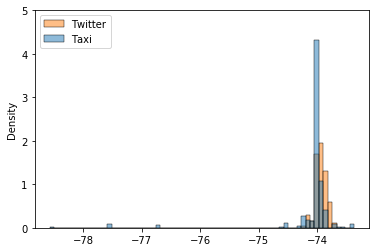

In [118]:
q25, q75 = np.percentile(taxi_df['lat'], [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(taxi_df['lat']) ** (-1/3)
bins = round((taxi_df['lat'].max() - taxi_df['lat'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

# plt.hist(taxi_df['lat'], density=True, bins=bins)  # density=False would make counts
# plt.ylabel('Count')
# plt.xlabel('Latitude')
# percentage = lambda i: len(i) / float(len(x)) * 100
taxi_lat = taxi_df['lat']
taxi_long = taxi_df['long']
twitter_lat = twitter_lat
plt.ylim(0, 5)
print("PLOTTING LATITUDE")

sns.histplot([twitter_lat, taxi_lat], bins=bins, stat='density');
plt.legend(labels=["Twitter", "Taxi"])

PRINTING LONGITUDE


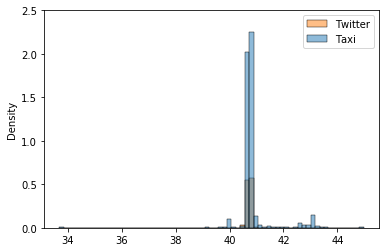

In [123]:
print("PRINTING LONGITUDE")
plt.ylim(0,)
sns.histplot([twitter_long, taxi_long], bins=bins, stat='density');
plt.legend(labels=["Twitter", "Taxi"])

Text(0.5, 0, 'Latitude')

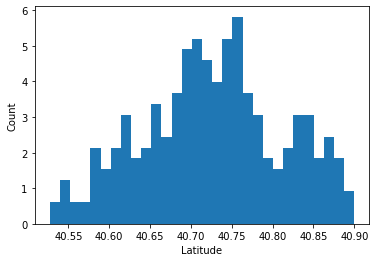

In [22]:
plt.hist(taxi_df['long'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Latitude')